Проект по анализу игровой индустрии
    
В данном проекте я проанализирую данные взятые из свободных источников о продажах игр по всему миру
    
Моя цель выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
План моего проекта следующий:
    
- Изучить общую информацию в полученном файле
    
- Провести предоработку данных 
    
- Исследовать данные и сделать анализ
    
- Составить портрет пользователя каждого региона
    
 - Проверить гипотезы:
    
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
    
- Сделать общий вывод и дать рекомендации


### Открываем файл с данными и изучаем общую информацию. 

Для начала загрузим библиотеку pandas, следующей строкой сам файл.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/games.csv')

Теперь посмотрим, через метод info , что представляет из себя файл, какие есть колонки, их типы.
Так же выведем первые 20 строк на экран.
Т.к. я не знаю, что меня ждет, напишу предварительно команду, чтобы показал все колонки.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Итак, на первый взгляд что мы видим:
- Названия колонок нужно привести к нижнему регистру
- Тип данныех для года выпуска float64, нужно перевести в int
- Есть пропуски значениях в колонках Critic_Score и User_Score, Rating посмотрим что с этим можно сделать.
Так же это влияет на тип данных в этих колонках. Сначала уберем пропуски, а потом преобразуем их во float64.

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.isna().sum()/len(data)*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Если год выпуска, это всего 269 линий пропущено от общего массива, что составляет примерно 1,5% , что не критично.
То пропуски в последних 3 столбцах Critic_Score, User_Score , Rating  это уже критично, такой объем данных нельзя просто так удалить.

In [8]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Выведем отдельно названия колонок, чтобы их было легче копировать.

In [9]:
data.duplicated().sum()

0

На всякий случай проверили есть ли явные дубликаты.

На первом этапе мы открыли файл, ознакомились с информацией. Выявили, что есть пропуски, а так же неверные типы данных в колонках. Так же поняли, что хотим перевести названия колонок в нижний регистр. Сам файл состоит из 16715 строк и 11 колонок.  

### Предобработка данных

Сначала заменим названия столбцов (приведем к нижнему регистру)

In [10]:
data.columns = data.columns.str.lower()

In [11]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Колонки готовы, теперь преобразуем год релиза в int.

In [12]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [13]:
data['year_of_release'] = data['year_of_release'].fillna('0')

In [14]:
data['year_of_release'].isna().sum()

0

In [15]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [16]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Т.к. я не хочу удалять строки , из-за отсутствия года выпуска игры, я все значения заменил на 0. После этого проверил, что пропусков действительно в колонке year_of_release нет.
Далее перевел тип данных в этой колонке в int64  и проверил это.

Теперь займемся пропусками в колонках с оценками.

In [17]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [18]:
data['user_score'] = data['user_score'].str.replace('tbd', '-99')

In [19]:
data['user_score'] = data['user_score'].fillna('-99')

In [20]:
data['user_score'] = data['user_score'].astype(float)

In [21]:
data['user_score'].sort_values().unique()

array([-99. ,   0. ,   0.2,   0.3,   0.5,   0.6,   0.7,   0.9,   1. ,
         1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,   1.9,
         2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,   2.8,
         2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,   3.7,
         3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,   4.6,
         4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,   5.5,
         5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,   6.4,
         6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,   7.3,
         7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,   8.2,
         8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,   9.1,
         9.2,   9.3,   9.4,   9.5,   9.6,   9.7])

In [22]:
data['critic_score'] = data['critic_score'].fillna('-99')

In [23]:
data['critic_score'] = data['critic_score'].astype(float)

In [24]:
data['rating'] = data['rating'].fillna('-99')

In [25]:
data.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

В оценках пользователей использовали аббревиатуру 'tbd' , что значит не применимо. Видимо на тот момент еще нельзя было оценить игру и это поле так заполняли. 
Т.к. пустые строки и оценки tbd мне нечем заполнить, я поставил -99 , чтобы не удалять такое количество строк.
В дальнейшем анализе я буду учитывать это и уберу фильтром.

Итак, после проверки, мы убедились, что есть всего пара пропусков в колонке имя и жанр, их трогать не буду, считаю не критичным.

Пропуски могут возникать по нескольким причинам:
- Возможно эту графу игнорировали, при заполнении
- Возможно при переносе данных, была утерена часть информации
- Возможно, это сводная таблица из нескольких баз и ранее такой графы просто не было

In [26]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [27]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']+ data['other_sales']

In [28]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99.0,-99.0,-99,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99.0,-99.0,-99,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-99.0,-99.0,-99,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-99.0,-99.0,-99,28.31


Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

### Исследовательский анализ данных

In [29]:
games_per_years =  data.pivot_table(index='year_of_release', values='name', aggfunc=['count'])

In [30]:
print(games_per_years)

                count
                 name
year_of_release      
0                 269
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


Сгрупировав количество вышедших игр по годам, видим, что в 80-е это единицы ( ну ладно пара десятков), далее в 90-е счет перевалил на сотни, а вот пик в тысячи пришелся на 2006-2011 года, далее пошел спад, видимо уже стали не просто их выпускать, а работать над качеством.
Так что данные до 2000-х не так уж и важны я считаю, было мало игр и все играли только их, потом у людей появился выбор, а там уже оценки по сравнение с конкурентами и платформы со своими эксклюзивами.

In [31]:
years_true = data.query('year_of_release != 0')

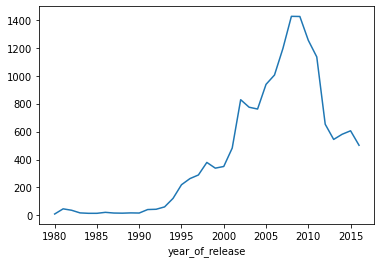

In [32]:
games_per_years_plot = years_true.pivot_table(index='year_of_release', values='name', aggfunc=['count']).plot(legend=None)

Приложил график, для наглядности. 2000-2010 эра игр, играли все. Даже моя мама.

Теперь посмотрим, какие платформы, как продавались сумарно. Далее возьмем топ продаваемых платформ и выведем продажи по годам.

In [33]:
sales_by_platform = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = sum)\
    .sort_values('total_sales', ascending = False)\
    .reset_index()

In [34]:
print(sales_by_platform)

   platform  total_sales
0       PS2      1255.77
1      X360       971.42
2       PS3       939.65
3       Wii       907.51
4        DS       806.12
5        PS       730.86
6       GBA       317.85
7       PS4       314.14
8       PSP       294.05
9        PC       259.52
10      3DS       259.00
11       XB       257.74
12       GB       255.46
13      NES       251.05
14      N64       218.68
15     SNES       200.04
16       GC       198.93
17     XOne       159.32
18     2600        96.98
19     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
22      GEN        30.77
23       DC        15.95
24      SCD         1.86
25       NG         1.44
26       WS         1.42
27     TG16         0.16
28      3DO         0.10
29       GG         0.04
30     PCFX         0.03


Итак, разница между 6-м местом и 7-м местом в 2 раза. Значит для отображения по годам возьму топ 6 продаж.

In [35]:
top_platform_by_year = data.query('platform == ["PS2" , "X360" , "PS3", "Wii", "DS", "PS"]')

Сделаем датафрейм только с нужными нам платформами, и возьмем строки, с имеющимися данными по году выпуска, т.к. до этого пустые строки в годах мы заменяли 0.

In [36]:
top_platform_by_year = top_platform_by_year.query('year_of_release != 0')

<AxesSubplot:xlabel='year_of_release'>

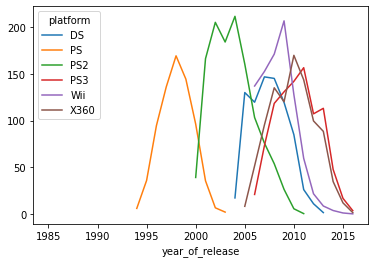

In [37]:
top_platform_by_year.pivot_table(index='year_of_release',columns = 'platform' , values='total_sales', aggfunc=
'sum').plot(kind='line')

На графике видна четкая тенденция для любой платформы: сначала идет рост, достигает пика и далее начинается убыль.

В среднем платформа живет около 10 лет, первые 5 стабильный рост, следующие - спад. Если хотите получать прибыль, будьте добры выпускать следующую версию платформы.

In [38]:
ps_life =  data.query('platform == ["PS2" , "PS" , "PS3", "PS4"]')

In [39]:
ps_life = ps_life.query('year_of_release != 0')

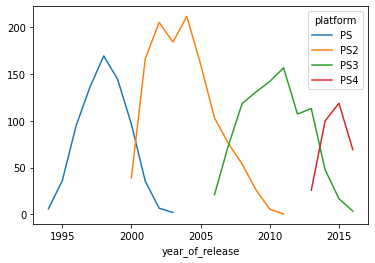

In [40]:
ps_life.pivot_table(index='year_of_release',columns = 'platform' , values='total_sales', aggfunc=
'sum').plot(kind='line');

Этого нет в задании, но инетерсно посмотреть как платформа ведет себя на уровне одной компании. Я всегда слышал что PS2 была самой культовой у Сони, что и показывает нам график. Видна четкая связь, в середине цикла затухания, выходит следующая версия, при этом какую-то часть времени они существуют параллельно.

Теперь сделаем отдельный датафрейм, где возьмем только данные за актауальный период.

Ранее мы сортировали данные по играм и годам и видно, что начиная с 2012 игр выходить стало меньше в 2 раза, чем в период с 2006 по 2011.
А учитывая тот факт, что средняя продолжительность жизни платформы 10 лет, и первые 5 лет это рост, то я принимаю решение, актуальные данные = последние 5 лет ( 2012-2016)

In [41]:
df = data.query('year_of_release > 2011')

Посмотрим, какие платформы лидируют в "нашем веке"

In [42]:
sales_by_platform_new = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = sum)\
    .sort_values('total_sales', ascending = False)\
    .reset_index()

In [43]:
sales_by_platform_new

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Видно, что Сони молодцы, не зря все мои знакомые сидят на "плойках".

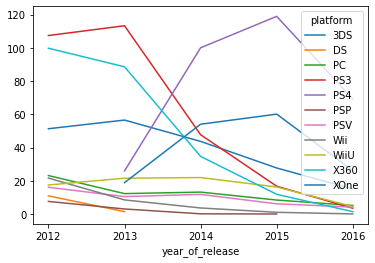

In [44]:
import matplotlib.pyplot as plt
df.pivot_table(index='year_of_release',columns = 'platform' , values='total_sales', aggfunc=
'sum').plot(kind='line')
plt.xticks([2012,2013,2014,2015,2016]);

Если не брать мелкие затухающие продажи, то из 4 топ игроков видно, что PS3 и X360 уже стремятся к 0, их эра кончилась. На 2016 год PS4 и X0ne достигли своего пика, а значит стоит ожидать прихода следующих поколений им на смену. 
Однако есть вероятность, что данные за 2016 не полные и обе платформы продолжат расти. Нужно обратится к программистам, узнать, все ли данные туда вошли за 2016.

П.с. сейчас то мы знаем, что это PS5 и Хbox serises X. А вот по результатам анализа, мы этого только ожидаем.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [45]:
top_platform_by_year_new_age = df.query('platform == ["PS4" , "PS3" , "X360", "3DS" , "XOne"]')

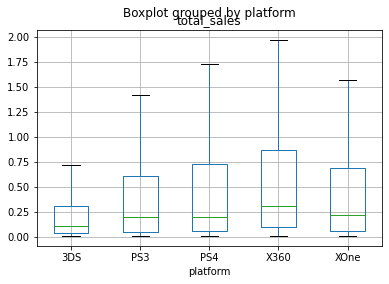

In [46]:
#top_platform_by_year_new_age.pivot_table(index='year_of_release',columns = 'platform' , values='year_of_release', aggfunc=
#'sum').boxplot()

top_platform_by_year_new_age.boxplot(column = 'total_sales' , by = 'platform' , showfliers = False)
plt.show()



Медиана у Х360 выше конкуретнов и нижнее значение тоже. Верхняя граница тоже вырывается в лидеры. Судя по всему игры для этой платформы самые прибыльные. или наоборот, платформа приносит играм доходы.
    
Если сравнивать поколения парами, то Х360 явно лидирует по отношению к ПС3, и ПС4 немного не дотягивает до Хоне, хотя вышли в свет они с разницей всегов  неделю.


Если сравнить с графиками, то результат тот же. У всех приставок медиана примерно посередине. Отличается только PS3, у нее были продажи уже падают, а медиана ближе к верхней границе, т.к. мы брали не весь цикл этой платформы.

Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для этого, не забудем, что в оценках у нас были загрушки (-99)

In [47]:
df_graphics_user = df.query('user_score > 0')
df_graphics_critic = df.query('critic_score > 0')

Коэффициент Пирсона составляет по оценкам критиков: 0.3081967459207781
Коэффициент Пирсона составляет по оценкам игроков: 0.0044288176754932575


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

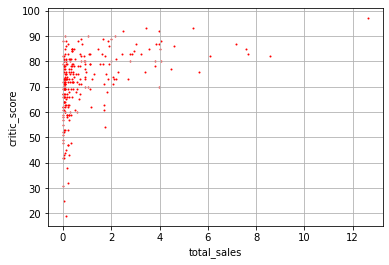

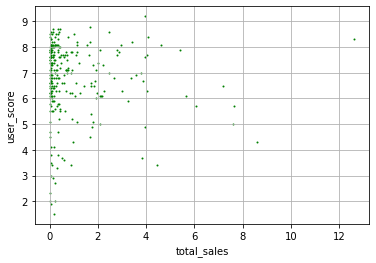

In [48]:
print('Коэффициент Пирсона составляет по оценкам критиков:' , df_graphics_critic['total_sales'].corr(df_graphics_critic['critic_score']))
print('Коэффициент Пирсона составляет по оценкам игроков:' , df_graphics_user['total_sales'].corr(df_graphics_user['user_score']))
df_graphics_critic.query('platform == "PS4"').plot(x='total_sales', y='critic_score', grid=True , s = 1 , c = 'red' , kind='scatter' , alpha=1)
df_graphics_user.query('platform == "PS4"').plot(x='total_sales', y='user_score', grid=True , s = 1 , c = 'green' , kind='scatter' , alpha=1) 

Итак, какие выводы можно сделать. Первое, это, что влияние по Пирсону показывает, что критики больше имеют шанса угудать с продажами. Их оценка больше , чем у игроков, но в любом случае коэффициент 0.3 маловато, для этого.
Второе, это диаграмма рассеивания показывает примерно одинаково - чем лучше оценки игр, тем лучше продажи.

Итак это была PS4, теперь посмотри на 3 поколение.

Коэффициент Пирсона составляет по оценкам критиков: 0.3314972592629587
Коэффициент Пирсона составляет по оценкам игроков: -0.005143522887113828


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

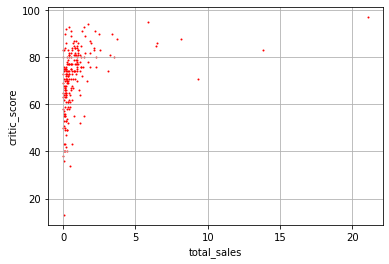

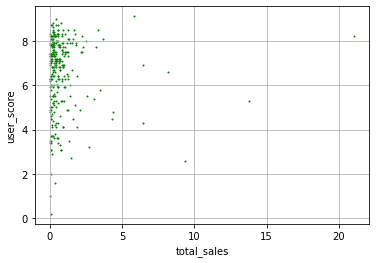

In [49]:
df_ps3_c = df_graphics_critic.query('platform == "PS3"')
df_ps3_u = df_graphics_user.query('platform == "PS3"')
print('Коэффициент Пирсона составляет по оценкам критиков:' , df_ps3_c['total_sales'].corr(df_ps3_c['critic_score']))
print('Коэффициент Пирсона составляет по оценкам игроков:' , df_ps3_u['total_sales'].corr(df_ps3_u['user_score']))

df_graphics_critic.query('platform == "PS3"').plot(x='total_sales', y='critic_score', grid=True , s = 1 , c = 'red' , kind='scatter' , alpha=1)
df_graphics_user.query('platform == "PS3"').plot(x='total_sales', y='user_score', grid=True , s = 1 , c = 'green' , kind='scatter' , alpha=1) 

У 3 поколения тоже самое. Ок, возьмем прямого конкурента. А коэф Пирсона для игроков, вообще отрицательный.

Коэффициент Пирсона составляет по оценкам критиков: 0.36057348885073365
Коэффициент Пирсона составляет по оценкам игроков: 0.0061639786462133256


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

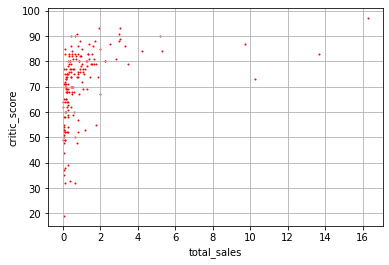

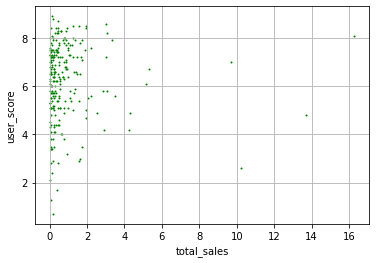

In [50]:
df_x360_c = df_graphics_critic.query('platform == "X360"')
df_x360_u = df_graphics_user.query('platform == "X360"')
print('Коэффициент Пирсона составляет по оценкам критиков:' , df_x360_c['total_sales'].corr(df_x360_c['critic_score']))
print('Коэффициент Пирсона составляет по оценкам игроков:' , df_x360_u['total_sales'].corr(df_x360_u['user_score']))

df_graphics_critic.query('platform == "X360"').plot(x='total_sales', y='critic_score', grid=True , s = 1 , c = 'red' , kind='scatter' , alpha=1)
df_graphics_user.query('platform == "X360"').plot(x='total_sales', y='user_score', grid=True , s = 1 , c = 'green' , kind='scatter' , alpha=1) 

Итак, можно сделать вывод. Чем лучше оценки у игры, тем выше ее продажи. А оценки игроков и критиков примерно совпадают. Но вот зависимость от оценки критиков для продаж выше, точнее она прощупывается.

Теперь посмотрим на игры со стороны жанров.

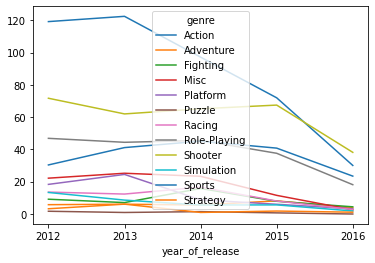

In [51]:
df.query('year_of_release >= 2012').pivot_table(index='year_of_release',columns = 'genre' , values='total_sales', aggfunc=
'sum').plot(kind='line')
plt.xticks([2012,2013,2014,2015,2016]);

In [52]:
genre_by_sales = data.query('year_of_release >= 2012').pivot_table(index = 'genre', values = 'total_sales', aggfunc = sum)\
    .sort_values('total_sales', ascending = False)\
    .reset_index()

In [53]:
genre_by_sales

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


Графически наверное не так понятно, как сводная. Но если взять сразу и то и то, то уже наглядно.
Самые продаваемые это экшн, далее спортивные сумулыторы, а вот продажи стратегий и пазлов кот наплакал.

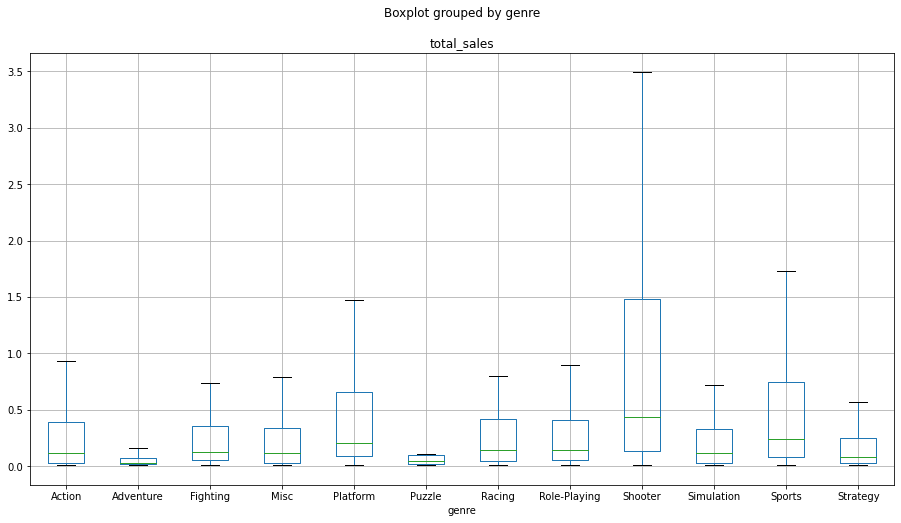

In [54]:
df.boxplot(column = 'total_sales' , by = 'genre' , showfliers = False , figsize=(15, 8))
plt.show()

### Составьте портрет пользователя каждого региона (NA, EU, JP)

Для начала посмотрим самые популярные платформы по регионам (топ-5).

In [55]:
sales_by_platform_na = df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = sum)\
    .sort_values('na_sales', ascending = False)\
    .reset_index()

In [56]:
sales_by_platform_eu = df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = sum)\
    .sort_values('eu_sales', ascending = False)\
    .reset_index()

In [57]:
sales_by_platform_jp = df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = sum)\
    .sort_values('jp_sales', ascending = False)\
    .reset_index()

In [58]:
print(sales_by_platform_na.head(5))
print(sales_by_platform_eu.head(5))
print(sales_by_platform_jp.head(5))

  platform  na_sales
0     X360    140.05
1      PS4    108.74
2      PS3    103.38
3     XOne     93.12
4      3DS     55.31
  platform  eu_sales
0      PS4    141.09
1      PS3    106.86
2     X360     74.52
3     XOne     51.59
4      3DS     42.64
  platform  jp_sales
0      3DS     87.79
1      PS3     35.29
2      PSV     21.04
3      PS4     15.96
4     WiiU     13.01


Итак лидеры платформ по регионам :
- Северная Америка X360, не удивительно, это же майкрософт, всегда хбоксов в америке было больше, чем плоек
- Европа PS  и сразу 2 поколения, что тоже не удивительно, европа предпочитает продукцию Сони
- Япония нинтендо и плойки, американщиной там и не пахнет.

Еще обращу внимание, что в Америке приставок продается в 2-3 раза больше. Видимо, там люди более обеспеченные и молодежи есть когда играть и на что покупать деньги. Американский рынок, привлекательнее.

Теперь разберем жанры по регионам:

In [59]:
genre_by_sales_na = df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = sum)\
    .sort_values('na_sales', ascending = False)\
    .reset_index()

In [60]:
genre_by_sales_eu = df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = sum)\
    .sort_values('eu_sales', ascending = False)\
    .reset_index()

In [61]:
genre_by_sales_jp = df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = sum)\
    .sort_values('jp_sales', ascending = False)\
    .reset_index()

In [62]:
print(genre_by_sales_na.head(5))
print(genre_by_sales_eu.head(5))
print(genre_by_sales_jp.head(5))

          genre  na_sales
0        Action    177.84
1       Shooter    144.77
2        Sports     81.53
3  Role-Playing     64.00
4          Misc     38.19
          genre  eu_sales
0        Action    159.34
1       Shooter    113.47
2        Sports     69.09
3  Role-Playing     48.53
4        Racing     27.29
          genre  jp_sales
0  Role-Playing     65.44
1        Action     52.80
2          Misc     12.86
3    Simulation     10.41
4      Fighting      9.44


Предпочтения американцев и евпропейцев одинаковые, разница только, что америка на 4 место предпочла платформеры, а европа - гонки ( видимо места мало и надо хоть где-то душу отвести, у америки длинные дороги и мощные моторы, им этого не надо).  А вот Япония на первое место ставит себе ролевые игры, чтож очень похоже на японцев.

Теперь проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [63]:
rating_by_sales_na = df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = sum)\
    .sort_values('na_sales', ascending = False)\
    .reset_index()

In [64]:
rating_by_sales_eu = df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = sum)\
    .sort_values('eu_sales', ascending = False)\
    .reset_index()

In [65]:
rating_by_sales_jp = df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = sum)\
    .sort_values('jp_sales', ascending = False)\
    .reset_index()

In [66]:
rating_by_sales_na

,rating,na_sales
0,M,231.57
1,E,114.37
2,-99,103.31
3,E10+,75.70
4,T,66.02


In [67]:
rating_by_sales_eu

,rating,eu_sales
0,M,193.96
1,E,113.03
2,-99,91.50
3,E10+,55.37
4,T,52.96


In [68]:
rating_by_sales_jp

,rating,jp_sales
0,-99,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


In [69]:
genre_without_rating = df.query('rating == "-99"').pivot_table(index = 'genre', values = 'jp_sales', aggfunc = sum)\
    .sort_values('jp_sales', ascending = False)\
    .reset_index()

In [70]:
genre_without_rating

,genre,jp_sales
0,Role-Playing,45.45
1,Action,29.39
2,Misc,8.08
3,Adventure,7.18
4,Fighting,5.28
5,Sports,4.42
6,Simulation,3.06
7,Strategy,2.56
8,Puzzle,1.33
9,Shooter,1.09




Мне даже стало интересно, это один жанр такой без рейтингов , или тут что-то еще. 
Поэтому я вывел продажи по жанрам в Японии игр без рейтинга. Но ответа мне это не дало (
Т.к. это новый период с 12 по 16 год, то мы точно знаем, что система рейтинга по возрасту уже есть.
Возможно это новые игры, которые только вышли и соответсвенно еще не получили рейтинг, или же он может быть 0+ и по каким-то причинам он не проставился. Возможно существуют игры, которые не требуют проверки рейтинга.
    
Но общая тенденция такова, что при остуствии рейтинга, отсутствуют и оценки критиков\пользователей.
Точного ответа к сожалению нет. Но скорее всего, не успели либо получить рейтинг, либо указать в таблицах его.


Итак, что мы видим. Америка и Европа, абсолютно одинаковые продажи по рейтингам, сначала игры для взрослых (18+), далее игры для всех, следом 10+ и завершают 13+. А вот Япония имеет другой порядок, Сначала игры для всех, потом 13+, а только потом 18+ ( видимо взрослым японцам некогда работать или продажа игр, там идет по более строгим правилам, у нас эти правила мне кажется игнорируются, иначе почему мой сын 10 лет уже играет 16+ игры?).

### Настало время проверки гипотез

Проверим гипотезу : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза будет звучать так: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная соответственно наоборот.

In [71]:
from scipy import stats as st
import numpy as np

In [72]:
df_theory = df.query('user_score > 0')

Не забываем учитывать, что пустые оценки мы заменяли на  -99

In [73]:
sample_1 = df_theory[df_theory['platform'] == 'XOne']['user_score'].dropna()

sample_2  = df_theory[df_theory['platform'] == 'PC']['user_score'].dropna()

print('Среднее значение для Xbox :' , sample_1.mean())
print('Среднее значение для PC :' , sample_2.mean())

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2 , equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


Среднее значение для Xbox : 6.521428571428572
Среднее значение для PC : 6.4286407766990274
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские оценки 6,5 и 6,4 действительно одинаковые, при критерии отклонения в 5%.

Теперь вторая теория: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Занчит нулевая теория, что рейтинги равны по этим жанрам, альтернативная -не равны.

In [74]:
sample_3 = df_theory[df_theory['genre'] == 'Action']['user_score'].dropna()

sample_4  = df_theory[df_theory['genre'] == 'Sports']['user_score'].dropna()

print('Среднее значение для Action :' , sample_3.mean())
print('Среднее значение для Sports :' , sample_4.mean())

alpha = 0.05

results = st.ttest_ind(sample_3, sample_4 , equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее значение для Action : 6.825047801147227
Среднее значение для Sports : 5.455897435897437
p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Тут хорошо видно, что рейтинг для экшн больше на 1,5 почти. И питон отверг теория. Все сходится, экшн оценивают лучше спортивных игр.

Гипотезы мы проверили, пришли к выводу, что пользователи не зависимо от платформ, принимает примерно равные решения по оценкам. А вот для рейтингов игр , пользователи ставят разные оценки. Экшн оценивают лучше, чем спортивные.

### Общий вывод по проекту

Получив данные из свободного источника, мы в первую очередь проверили данные на необходимость доработки и получили общую информацию по файлу.
Что мы узнали:
Общее количество строк – 16715, но в отдельных столбцах были пропуски.
Файл содержал данные по платформам и играм , а так же данные по продажам и рейтинговые оценки.

Данные по играм были начиная с 1980 года и заканчивались 2016.

Для доработки файла нам потребовалось:

•	Привести название колонок к нижнему регистру
•	Тип данных для года выпуска float64 перевести в int
•	Есть пропуски значениях в колонках Critic_Score и User_Score, Rating 

Т.к. я не хотел удалять какие-либо данные, то я заменил пропуски где-то заглушками (-99), а год 0. Далее , при анализе я использовал фильтр query, чтобы они не мешали анализу.

Далее я добавил колонку total_sales , которая показывает сумарные продажи.
Когда я убедился, что дубликатов и пропусков нет, я приступил к анализу.

Сгрупировав количество вышедших игр по годам, видим, что в 80-е это единицы далее в 90-е счет перевалил на сотни, а вот пик в тысячи пришелся на 2006-2011 года, далее пошел спад, видимо уже стали не просто их выпускать, а работать над качеством. Так что данные до 2000-х не так уж и важны я считаю, было мало игр и все играли только их, потом у людей появился выбор, а там уже оценки по сравнение с конкурентами и платформы со своими эксклюзивами.


Топ 6 платформ составили "PS2" , "X360" , "PS3", "Wii", "DS", "PS" 
разница между 6-м местом и 7-м местом в 2 раза. Значит для отображения по годам возьму топ 6 продаж.

На графике видна четкая тенденция для любой платформы: сначала идет рост, достигает пика и далее начинается убыль.
В среднем платформа живет около 10 лет, первые 5 стабильный рост, следующие - спад. Если хотите получать прибыль, будьте добры выпускать следующую версию платформы.


Далее, для прогноза на 2017 год я пришел к выводу , что: ранее мы сортировали данные по играм и годам и видно, что начиная с 2012 игр выходить стало меньше в 2 раза, чем в период с 2006 по 2011. А учитывая тот факт, что средняя продолжительность жизни платформы 10 лет, и первые 5 лет это рост, то я принимаю решение, актуальные данные = последние 5 лет ( 2012-2016) 


Топ 5 платформ за последние 5 лет : PS4, PS3, X360, 3DS, XOne

Если не брать мелкие затухающие продажи, то из 4 топ игроков видно, что PS3 и X360 уже стремятся к 0, их эра кончилась. На 2016 год PS4 и X0ne достигли своего пика, а значит стоит ожидать прихода следующих поколений им на смену. Однако есть вероятность, что данные за 2016 не полные и обе платформы продолжат расти. Нужно обратится к программистам, узнать, все ли данные туда вошли за 2016.


П.с. сейчас то мы знаем, что это PS5 и Хbox serises X. А вот по результатам анализа, мы этого только ожидаем.


Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.


Для этого построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.


Итак, какие выводы можно сделать.

Первое, это, что влияние по Пирсону показывает, что критики больше имеют шанса угадать с продажами. Их оценка больше , чем у игроков, но в любом случае коэффициент 0.3 маловато, для этого. Второе, это диаграмма рассеивания показывает примерно одинаково - чем лучше оценки игр, тем лучше продажи.

Теперь посмотрим на игры со стороны жанров.


Самые продаваемые это шутеры, далее спортивные сумулыторы и платформеры, а вот продажи пазлов  кот наплакал.

Составьте портрет пользователя каждого региона (NA, EU, JP)


Итак лидеры платформ по регионам :

•	Северная Америка X360, не удивительно, это же майкрософт, всегда хбоксов в америке было больше, чем плоек
•	Европа PS и сразу 2 поколения, что тоже не удивительно, европа предпочитает продукцию Сони
•	Япония нинтендо и плойки, американщиной там и не пахнет.


Еще обращу внимание, что в Америке приставок продается в 2-3 раза больше. Видимо, там люди более обеспеченные и молодежи есть когда играть и на что покупать деньги. Американский рынок, привлекательнее.


Предпочтения американцев и евпропейцев одинаковые, разница только, что америка на 4 место предпочла платформеры, а европа - гонки ( видимо места мало и надо хоть где-то душу отвести, у америки длинные дороги и мощные моторы, им этого не надо). А вот Япония на первое место ставит себе ролевые игры, чтож очень похоже на японцев.


Теперь проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.


Итак, что мы видим. Америка и Европа, абсолютно одинаковые продажи по рейтингам, сначала игры для взрослых (18+), далее игры для всех, потом игры без рейтинга, а следом 10+ и завершают 13+. А вот Япония имеет другой порядок, сначала игры без рейтинга , потом игры для всех, потом 13+, а только потом 18+ ( видимо взрослым японцам некогда работать или продажа игр, там идет по более строгим правилам, у нас эти правила мне кажется игнорируются, иначе почему мой сын 10 лет уже играет 16+ игры?).


Проверим гипотезу : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Нулевая гипотеза будет звучать так: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Среднее значение для Xbox : 6.521428571428572
Среднее значение для PC : 6.4286407766990274
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу

Альтернативная соответственно наоборот.
Средние пользовательские оценки 6,5 и 6,4 действительно одинаковые, при критерии отклонения в 5%.



Теперь вторая теория: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Занчит нулевая теория, что рейтинги равны по этим жанрам, альтернативная -не равны.

Среднее значение для Action : 6.825047801147227
Среднее значение для Sports : 5.455897435897437
p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Тут хорошо видно, что рейтинг для экшн больше на 1,5 почти. И питон отверг теория. Все сходится, экшн оценивают лучше спортивных игр.
Гипотезы мы проверили, пришли к выводу, что пользователи не зависимо от платформ, принимает примерно равные решения по оценкам. А вот для рейтингов игр , пользователи ставят разные оценки. Экшн оценивают лучше, чем спортивные.


И напоследок консолидируем общую информацию, чтобы можно было применить к стратегии ассортимента нашего магазина «Стримчик».

Продажи игр с 2005 по 2011 росла, потом уже стала падать, не стоит в 2017 ждать продаж выше уровня последних 5 лет.

Ассортимент для плоек и хбокс можно держать шире, там хорошие продажи. Альтернативные платформы продаются хуже, там надо относится к закупкам аккуратнее.

Особое внимание к играм на платформах PS4 и X0ne, там сейчас хорошие продажи, но вот-вот пойдет спад, стоит ожидать появления новой платформы от каждого производителя и смело вкладываться в игры для новой поколения, их продажи будут расти.

При выборе ассортимента игр, внимательнее стоит смотреть на оценки критиков, они больше приближены к реальности.

По жанрам лучше вкладываться в экшен, шутера, ролевики и спортивные.

На американском рынке лучше держаться игр для хбокс, в европе и японии для сони.

У америки и европы главные жанры – экшн, шутер и спорт, у японии – игры без рейтинга , ролевики и экшн.

 Америка и Европа, абсолютно одинаковые продажи по рейтингам, сначала игры для взрослых (18+), далее игры для всех, следом 10+ и завершают 13+. А вот Япония имеет другой порядок, сначала игры без рейтинга, потом для всех, потом 13+, а только потом 18+ 
Если хотите опираться на рейтинг пользователей, то они одинаковые для игр на разных платформах.

Рейтинг пользователей по жанрам разный, например экшн намного лучше оценивают, чем спорт.





